In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors

# File to Load (Remember to change these)
cityfile = "city_data.csv"
ridefile = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(cityfile)
ride_df = pd.read_csv(ridefile)

# Combine the data into a single dataset
cityride = pd.merge(ride_df, city_df, on = 'city', how = 'left')
# Display the data table for preview
print(cityride.head())

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  


In [3]:
cityride = pd.DataFrame(cityride)
cityride.head()
cityride.columns
cityride.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

## Bubble Plot of Ride Sharing Data

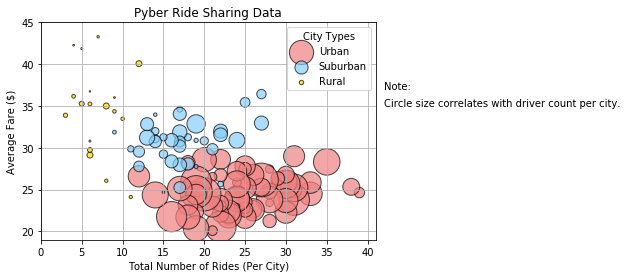

In [56]:
# Obtain the x and y coordinates for each of the three city types

urban_df = cityride.loc[cityride['type'] == 'Urban']
suburban_df = cityride.loc[cityride['type'] == 'Suburban']
rural_df = cityride.loc[cityride['type'] == 'Rural']

ridecount_urban = urban_df['city'].value_counts()
ridecount_suburban = suburban_df['city'].value_counts()
ridecount_rural = rural_df['city'].value_counts()

grouped_urban = urban_df.groupby(['city'])
avg_urbanfare = grouped_urban['fare'].mean()
grouped_suburban = suburban_df.groupby(['city'])
avg_suburbanfare = grouped_suburban['fare'].mean()
grouped_rural = rural_df.groupby(['city'])
avg_ruralfare = grouped_rural['fare'].mean()

urban_drv = urban_df.groupby(['city'])
urbandrv_count = urban_drv['driver_count'].sum() / 2
suburban_drv = suburban_df.groupby(['city'])
suburbandrv_count = suburban_drv['driver_count'].sum() / 2
rural_drv = rural_df.groupby(['city'])
ruraldrv_count = rural_drv['driver_count'].sum() / 2

# Build the scatter plots for each city types

# urban, = plt.plot(kind = 'scatter', x = ridecount_urban, y = avg_urbanfare, marker = 'o', color = 'tomato', edgecolor = 'black', s = urbandrv_count, label = 'Urban')
# suburban, = plt.plot(kind = 'scatter', x = ridecount_suburban, y = avg_suburbanfare, marker = 'o', color = 'lightskyblue', edgecolor = 'black', s = suburbandrv_count, label = 'Suburban')
# rural, = plt.plot(kind = 'scatter', x = ridecount_rural, y = avg_ruralfare, marker = 'o', color = 'khaki', edgecolor = 'black', s = ruraldrv_count, label = 'Rural')

urban = plt.scatter(ridecount_urban, avg_urbanfare, marker = 'o', color = 'lightcoral', edgecolor = 'black', s = urbandrv_count, alpha = .70)
suburban = plt.scatter(ridecount_suburban, avg_suburbanfare, marker = 'o', color = 'lightskyblue', edgecolor = 'black', s = suburbandrv_count, alpha = .7)
rural = plt.scatter(ridecount_rural, avg_ruralfare, marker = 'o', color = 'gold', edgecolor = 'black', s = ruraldrv_count, alpha = .7)

# Incorporate the other graph properties
plt.ylim(19, 45)
plt.xlim(0, 41)
plt.grid()
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data')

# Create a legend

# plt.legend(handles = [urban, suburban, rural], title = 'City Types')
plt.legend(labels = ['Urban', 'Suburban', 'Rural'], title = 'City Types')

# Incorporate a text label regarding circle size
plt.text(42, 37, 'Note:')
plt.text(42, 35, 'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig('PyberRideScatterPlot.png')
plt.show()

## Total Fares by City Type

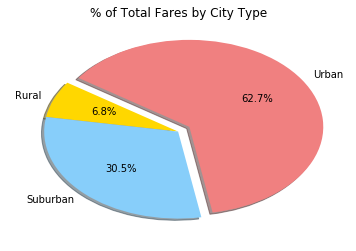

In [57]:
# Calculate Type Percents
city_types = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral', 'gold', 'lightskyblue']
fares_pct = []
# fares_pct = [[cityride.loc[cityride['type'] == x]).sum() / cityride['fare'].sum()) for x in city_types]]

for x in city_types:
    pctdf = cityride.loc[cityride['type'] == x]
    fares_pct.append(pctdf['fare'].sum() / cityride['fare'].sum())

# Build Pie Chart
plt.pie(fares_pct, labels = city_types, colors = colors, startangle = -80, explode = [.1, 0, 0], autopct="%1.1f%%", shadow = True)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('TotalFaresbyCityType.png')
plt.show()

## Total Rides by City Type

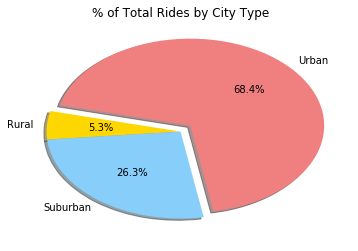

In [38]:
# Calculate Ride Percents
city_types = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral', 'gold', 'lightskyblue']
rides_pct = []

for x in city_types:
    ridesdf = cityride.loc[cityride['type'] == x]
    rides_pct.append(ridesdf['ride_id'].count() / cityride['ride_id'].count())

# Build Pie Chart
plt.pie(rides_pct, labels = city_types, colors = colors, startangle = -80, explode = [.1, 0, 0], autopct="%1.1f%%", shadow = True)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('TotalRidesbyCityType.png')
plt.show()

## Total Drivers by City Type

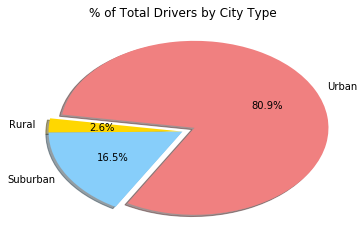

In [49]:
# Calculate Ride Percents
city_types = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral', 'gold', 'lightskyblue']
drivers_pct = []

for x in city_types:
    driversdf = city_df.loc[city_df['type'] == x]
    drivers_pct.append(driversdf['driver_count'].sum() / city_df['driver_count'].count())

# Build Pie Chart
plt.pie(drivers_pct, labels = city_types, colors = colors, startangle = 240, explode = [.1, 0, 0], autopct="%1.1f%%", shadow = True)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('TotalDriversbyCityType.png')
plt.show()

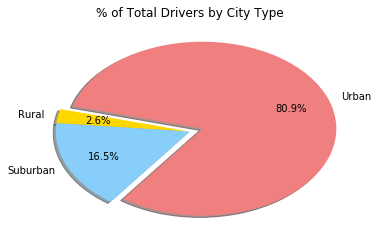